In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('train.csv')
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.544971,Ideal,E,SI1,63.911017,52.575829,5.447452,4.053076,3.701485,3.558
1,2.073682,Premium,J,SI1,67.642925,57.660288,6.266665,7.661507,6.177051,24.738
2,0.606198,Premium,G,VS1,55.617310,60.388787,6.800151,5.096966,3.480326,3.630
3,0.695397,Premium,G,SI2,60.587811,71.325721,5.366931,6.616767,4.454435,4.218
4,0.282651,Ideal,E,VVS2,68.970056,54.372123,4.920104,4.409408,4.361358,1.578
...,...,...,...,...,...,...,...,...,...,...
11995,0.251768,Premium,E,VS1,69.674513,52.790228,5.657402,5.832983,3.386799,1.628
11996,1.729415,Premium,H,SI1,56.191121,48.024573,6.725585,8.624433,4.822269,15.508
11997,2.252697,Very Good,I,SI2,64.007494,63.641838,8.510526,9.108384,3.674364,20.018
11998,0.139030,Very Good,D,VS2,64.885328,55.383459,2.799799,2.281538,2.419920,0.746


In [3]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
data.describe()

,carat,depth,table,x,y,z,price
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.795368,61.720080,57.490596,5.731005,5.716316,3.528779,7.846779
std,0.485184,5.160848,5.473837,1.492658,1.503996,1.216390,8.000676
min,0.020265,39.768041,36.987798,0.031002,0.307422,0.006598,0.652000
25%,0.405042,58.227008,53.812489,4.659935,4.631587,2.684302,1.886000
50%,0.684387,61.720635,57.388137,5.681654,5.678285,3.508792,4.734000
75%,1.074885,65.219405,61.172691,6.747104,6.738530,4.361609,10.730000
max,4.445496,81.160537,84.895276,11.133427,11.205688,7.983576,37.608000


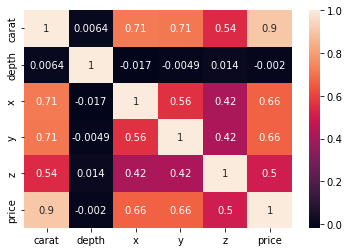

In [5]:
feature_corre = ['carat','depth','x','y','z', 'price']
sns.heatmap(data[feature_corre].corr(),annot=True);

In [6]:
data1 = data.drop(['depth'], axis=1)
data1

,carat,cut,color,clarity,table,x,y,z,price
0,0.544971,Ideal,E,SI1,52.575829,5.447452,4.053076,3.701485,3.558
1,2.073682,Premium,J,SI1,57.660288,6.266665,7.661507,6.177051,24.738
2,0.606198,Premium,G,VS1,60.388787,6.800151,5.096966,3.480326,3.630
3,0.695397,Premium,G,SI2,71.325721,5.366931,6.616767,4.454435,4.218
4,0.282651,Ideal,E,VVS2,54.372123,4.920104,4.409408,4.361358,1.578
...,...,...,...,...,...,...,...,...,...
11995,0.251768,Premium,E,VS1,52.790228,5.657402,5.832983,3.386799,1.628
11996,1.729415,Premium,H,SI1,48.024573,6.725585,8.624433,4.822269,15.508
11997,2.252697,Very Good,I,SI2,63.641838,8.510526,9.108384,3.674364,20.018
11998,0.139030,Very Good,D,VS2,55.383459,2.799799,2.281538,2.419920,0.746


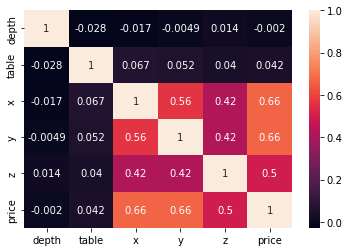

In [7]:
feature_corre = ['depth','table','x','y','z', 'price']
sns.heatmap(data[feature_corre].corr(),annot=True);

In [8]:
temp = pd.get_dummies(data['color'], drop_first=True)
data1 = pd.concat([temp, data1], axis=1)
data1

,E,F,G,H,I,J,carat,cut,color,clarity,table,x,y,z,price
0,1,0,0,0,0,0,0.544971,Ideal,E,SI1,52.575829,5.447452,4.053076,3.701485,3.558
1,0,0,0,0,0,1,2.073682,Premium,J,SI1,57.660288,6.266665,7.661507,6.177051,24.738
2,0,0,1,0,0,0,0.606198,Premium,G,VS1,60.388787,6.800151,5.096966,3.480326,3.630
3,0,0,1,0,0,0,0.695397,Premium,G,SI2,71.325721,5.366931,6.616767,4.454435,4.218
4,1,0,0,0,0,0,0.282651,Ideal,E,VVS2,54.372123,4.920104,4.409408,4.361358,1.578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,0,0,0,0,0,0.251768,Premium,E,VS1,52.790228,5.657402,5.832983,3.386799,1.628
11996,0,0,0,1,0,0,1.729415,Premium,H,SI1,48.024573,6.725585,8.624433,4.822269,15.508
11997,0,0,0,0,1,0,2.252697,Very Good,I,SI2,63.641838,8.510526,9.108384,3.674364,20.018
11998,0,0,0,0,0,0,0.139030,Very Good,D,VS2,55.383459,2.799799,2.281538,2.419920,0.746


In [9]:
temp = pd.get_dummies(data['cut'], drop_first=True)
data1 = pd.concat([temp, data1], axis=1)
data1

,Good,Ideal,Premium,Very Good,E,F,G,H,I,J,carat,cut,color,clarity,table,x,y,z,price
0,0,1,0,0,1,0,0,0,0,0,0.544971,Ideal,E,SI1,52.575829,5.447452,4.053076,3.701485,3.558
1,0,0,1,0,0,0,0,0,0,1,2.073682,Premium,J,SI1,57.660288,6.266665,7.661507,6.177051,24.738
2,0,0,1,0,0,0,1,0,0,0,0.606198,Premium,G,VS1,60.388787,6.800151,5.096966,3.480326,3.630
3,0,0,1,0,0,0,1,0,0,0,0.695397,Premium,G,SI2,71.325721,5.366931,6.616767,4.454435,4.218
4,0,1,0,0,1,0,0,0,0,0,0.282651,Ideal,E,VVS2,54.372123,4.920104,4.409408,4.361358,1.578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,1,0,1,0,0,0,0,0,0.251768,Premium,E,VS1,52.790228,5.657402,5.832983,3.386799,1.628
11996,0,0,1,0,0,0,0,1,0,0,1.729415,Premium,H,SI1,48.024573,6.725585,8.624433,4.822269,15.508
11997,0,0,0,1,0,0,0,0,1,0,2.252697,Very Good,I,SI2,63.641838,8.510526,9.108384,3.674364,20.018
11998,0,0,0,1,0,0,0,0,0,0,0.139030,Very Good,D,VS2,55.383459,2.799799,2.281538,2.419920,0.746


In [10]:
temp = pd.get_dummies(data['clarity'], drop_first=True)
data1 = pd.concat([temp, data1], axis=1)
data1

,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,Good,Ideal,Premium,...,J,carat,cut,color,clarity,table,x,y,z,price
0,0,1,0,0,0,0,0,0,1,0,...,0,0.544971,Ideal,E,SI1,52.575829,5.447452,4.053076,3.701485,3.558
1,0,1,0,0,0,0,0,0,0,1,...,1,2.073682,Premium,J,SI1,57.660288,6.266665,7.661507,6.177051,24.738
2,0,0,0,1,0,0,0,0,0,1,...,0,0.606198,Premium,G,VS1,60.388787,6.800151,5.096966,3.480326,3.630
3,0,0,1,0,0,0,0,0,0,1,...,0,0.695397,Premium,G,SI2,71.325721,5.366931,6.616767,4.454435,4.218
4,0,0,0,0,0,0,1,0,1,0,...,0,0.282651,Ideal,E,VVS2,54.372123,4.920104,4.409408,4.361358,1.578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,1,0,0,0,0,0,1,...,0,0.251768,Premium,E,VS1,52.790228,5.657402,5.832983,3.386799,1.628
11996,0,1,0,0,0,0,0,0,0,1,...,0,1.729415,Premium,H,SI1,48.024573,6.725585,8.624433,4.822269,15.508
11997,0,0,1,0,0,0,0,0,0,0,...,0,2.252697,Very Good,I,SI2,63.641838,8.510526,9.108384,3.674364,20.018
11998,0,0,0,0,1,0,0,0,0,0,...,0,0.139030,Very Good,D,VS2,55.383459,2.799799,2.281538,2.419920,0.746


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
#instantiate the models
linearRegressor = LinearRegression()

In [13]:
data1 = data1.drop(['cut'], axis=1)
data1 = data1.drop(['color'], axis=1)
data1 = data1.drop(['clarity'], axis=1)                   
data1


,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,Good,Ideal,Premium,...,G,H,I,J,carat,table,x,y,z,price
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0.544971,52.575829,5.447452,4.053076,3.701485,3.558
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,2.073682,57.660288,6.266665,7.661507,6.177051,24.738
2,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0.606198,60.388787,6.800151,5.096966,3.480326,3.630
3,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0.695397,71.325721,5.366931,6.616767,4.454435,4.218
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0.282651,54.372123,4.920104,4.409408,4.361358,1.578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0.251768,52.790228,5.657402,5.832983,3.386799,1.628
11996,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1.729415,48.024573,6.725585,8.624433,4.822269,15.508
11997,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,2.252697,63.641838,8.510526,9.108384,3.674364,20.018
11998,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.139030,55.383459,2.799799,2.281538,2.419920,0.746


In [14]:
data1.corr()

,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,Good,Ideal,Premium,...,G,H,I,J,carat,table,x,y,z,price
IF,1.000000,-0.110447,-0.086345,-0.080897,-0.104298,-0.051689,-0.062838,-0.034009,0.101597,-0.045568,...,0.073003,0.025116,-0.016475,-0.020806,-0.114525,-0.022569,-0.109115,-0.109277,-0.074093,-0.053349
SI1,-0.110447,1.000000,-0.255981,-0.239830,-0.309204,-0.153239,-0.186293,0.043260,-0.084779,0.023873,...,-0.084372,0.014605,0.018374,0.017166,0.060871,0.020806,0.059294,0.057717,0.042646,0.007703
SI2,-0.086345,-0.255981,1.000000,-0.187494,-0.241729,-0.119799,-0.145640,0.043951,-0.107353,0.058835,...,-0.043010,0.025321,0.006140,-0.005299,0.266235,0.030593,0.201356,0.202262,0.143982,0.125672
VS1,-0.080897,-0.239830,-0.187494,1.000000,-0.226477,-0.112240,-0.136451,-0.007729,0.025491,-0.006872,...,0.051081,-0.011204,0.011696,0.026717,-0.063235,-0.007258,-0.036737,-0.034423,-0.036701,-0.009340
VS2,-0.104298,-0.309204,-0.241729,-0.226477,1.000000,-0.144707,-0.175921,-0.015092,0.017528,0.028837,...,-0.019398,-0.030416,-0.009138,0.024317,-0.032083,-0.009705,-0.006961,-0.026342,-0.009378,0.009170
VVS1,-0.051689,-0.153239,-0.119799,-0.112240,-0.144707,1.000000,-0.087185,-0.038611,0.091472,-0.054945,...,0.049854,-0.004648,-0.003522,-0.033591,-0.167522,-0.026854,-0.146618,-0.144382,-0.101260,-0.099532
VVS2,-0.062838,-0.186293,-0.145640,-0.136451,-0.175921,-0.087185,1.000000,-0.041789,0.079036,-0.071483,...,0.055991,-0.019204,-0.029094,-0.042175,-0.137507,-0.019210,-0.119643,-0.102414,-0.083600,-0.057236
Good,-0.034009,0.043260,0.043951,-0.007729,-0.015092,-0.038611,-0.041789,1.000000,-0.264145,-0.185194,...,-0.033201,-0.016043,0.001614,0.026575,0.038895,0.056959,0.032984,0.028589,0.036179,0.003009
Ideal,0.101597,-0.084779,-0.107353,0.025491,0.017528,0.091472,0.079036,-0.264145,1.000000,-0.477554,...,0.040301,-0.013069,-0.000787,-0.048379,-0.164339,-0.216839,-0.125010,-0.116000,-0.103972,-0.099323
Premium,-0.045568,0.023873,0.058835,-0.006872,0.028837,-0.054945,-0.071483,-0.185194,-0.477554,1.000000,...,0.002514,0.019611,-0.006091,0.017296,0.094432,0.130011,0.080548,0.067171,0.038253,0.074422


In [15]:
data1 = data1.drop(['SI1'], axis=1)
data1 = data1.drop(['VS1'], axis=1)
data1 = data1.drop(['VS2'], axis=1)
data1 = data1.drop(['Good'], axis=1)
data1

,IF,SI2,VVS1,VVS2,Ideal,Premium,Very Good,E,F,G,H,I,J,carat,table,x,y,z,price
0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.544971,52.575829,5.447452,4.053076,3.701485,3.558
1,0,0,0,0,0,1,0,0,0,0,0,0,1,2.073682,57.660288,6.266665,7.661507,6.177051,24.738
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0.606198,60.388787,6.800151,5.096966,3.480326,3.630
3,0,1,0,0,0,1,0,0,0,1,0,0,0,0.695397,71.325721,5.366931,6.616767,4.454435,4.218
4,0,0,0,1,1,0,0,1,0,0,0,0,0,0.282651,54.372123,4.920104,4.409408,4.361358,1.578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0,0,1,0,1,0,0,0,0,0,0.251768,52.790228,5.657402,5.832983,3.386799,1.628
11996,0,0,0,0,0,1,0,0,0,0,1,0,0,1.729415,48.024573,6.725585,8.624433,4.822269,15.508
11997,0,1,0,0,0,0,1,0,0,0,0,1,0,2.252697,63.641838,8.510526,9.108384,3.674364,20.018
11998,0,0,0,0,0,0,1,0,0,0,0,0,0,0.139030,55.383459,2.799799,2.281538,2.419920,0.746


In [16]:
x = data1.iloc[:,0:17]
y = data1.iloc[:,18]

In [17]:
# split the datasets into input(x) and output(y)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.1)
print(xTrain.shape, xTest.shape)
print(yTrain.shape, yTest.shape)

(10800, 17) (1200, 17)
(10800,) (1200,)


In [18]:
print(yTrain)

7015     31.868
1429      6.452
5561      1.198
3320     21.454
1494      1.810
          ...  
8342      7.376
3163     16.762
1888     21.508
6370      3.180
11401    14.414
Name: price, Length: 10800, dtype: float64


In [19]:
model = LinearRegression().fit(xTrain, yTrain)
print("Linear Regression accuracy: ",model.score(xTrain, yTrain))

Linear Regression accuracy:  0.8524788712388105


In [20]:
model.coef_

array([ 2.46366920e+00, -2.49255726e+00,  1.86303431e+00,  1.68659653e+00,
        1.21720432e+00,  9.27701504e-01,  9.44893589e-01, -4.14881080e-01,
       -5.58046921e-01, -6.63411475e-01, -1.83029166e+00, -2.46093824e+00,
       -3.99045222e+00,  1.53925543e+01, -6.03483633e-03,  2.58572224e-01,
        2.35310714e-01])

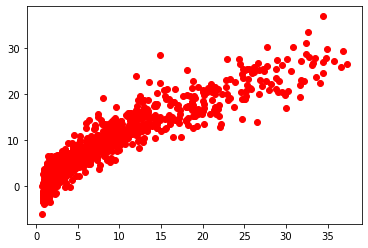

In [21]:
yPred = model.predict(xTest)
plt.scatter(yTest,yPred, c= 'red')

In [22]:
print("Logistic Regression accuracy: ",model.score(xTest, yTest))

Logistic Regression accuracy:  0.8624189483879074
